In [1]:
import h5py
import numpy as  np
from pathlib import Path

Stanie na 2m

In [2]:
BASE_DIR = Path("D:/Studia/sium/semestr3/radar-project/data")  # change to your project dir

loaded_file = h5py.File(BASE_DIR/'dataset.h5','r')
frames = loaded_file['13']['dataset_13']

In [3]:
n = 512 *  2
timestep = 1/2924
freq = np.fft.fftfreq(n, d=timestep)[:n//2]

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,10)
from source.preprocessHighFPS import _chunk_to_fft

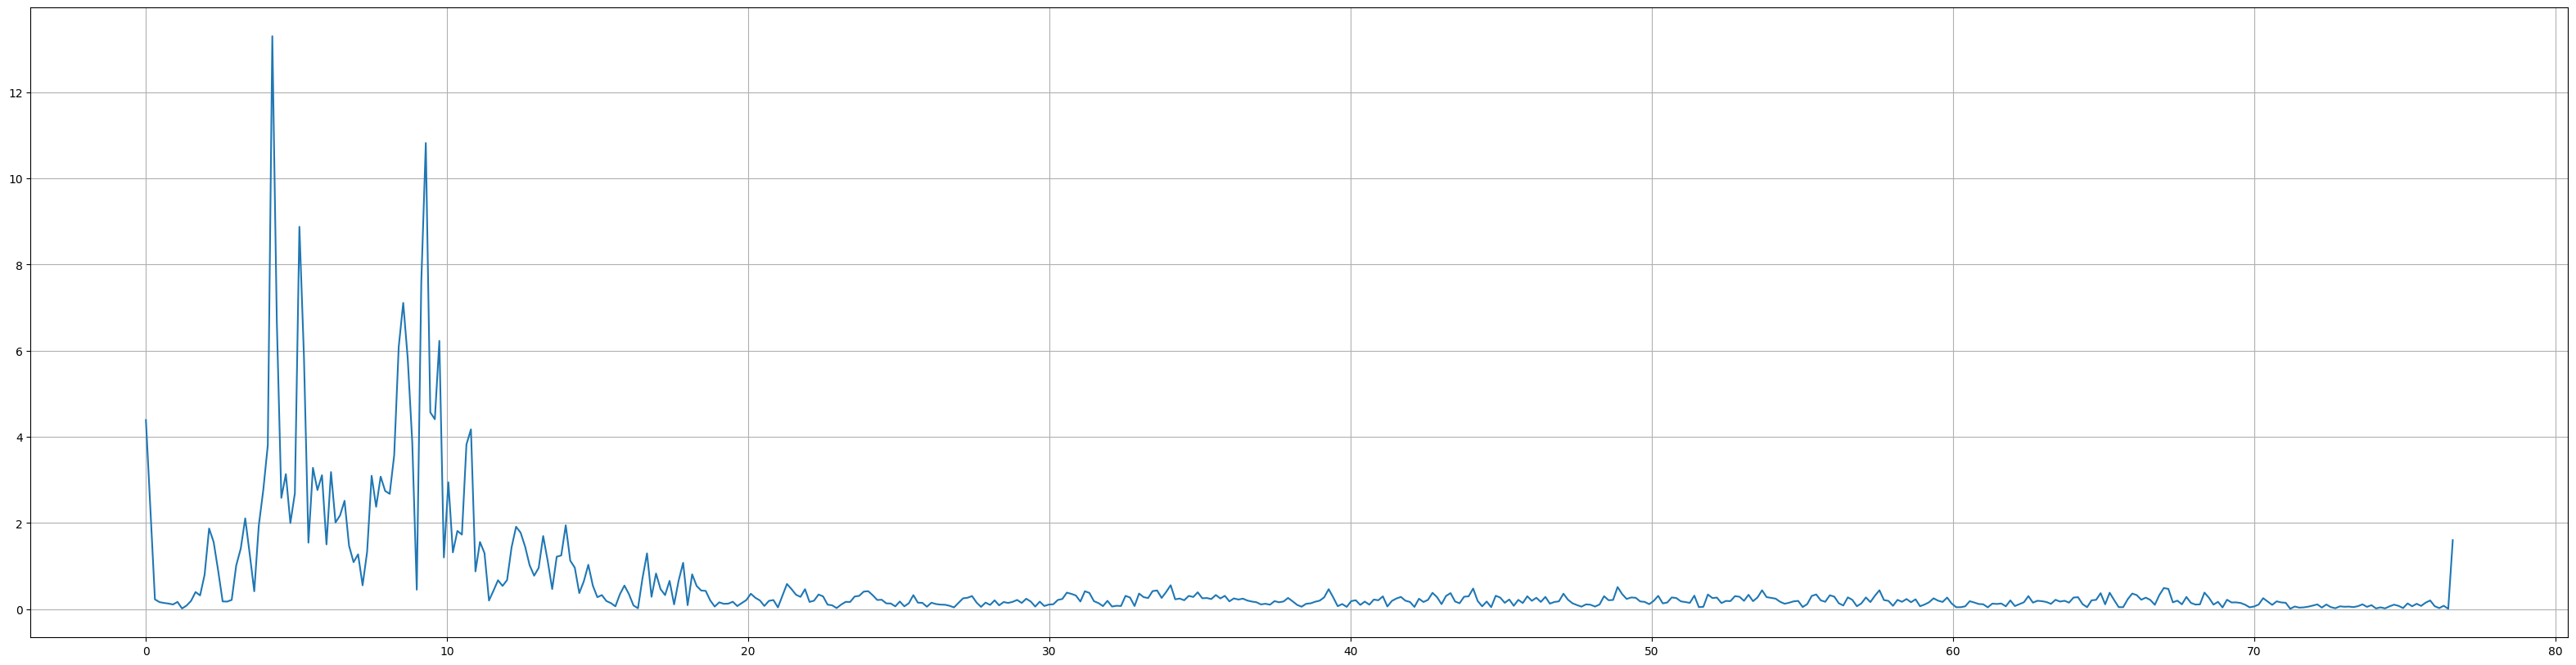

In [5]:

N = 512 * 2 # *2 żeby później usunąć negatywne wartości i nadal mieć 512 wartości
T = 1/2924 # Sample Rate(ksps)
yf = frames[1,0,0,:]
yf = _chunk_to_fft(yf)

xf = np.fft.fftfreq(N, d=T)[:N//2]
scale = 1/0.05249386419 # z frequnecy slope
xf_scaled = xf / scale


plt.plot(xf_scaled, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
# plt.xlim(0,10)
plt.show()

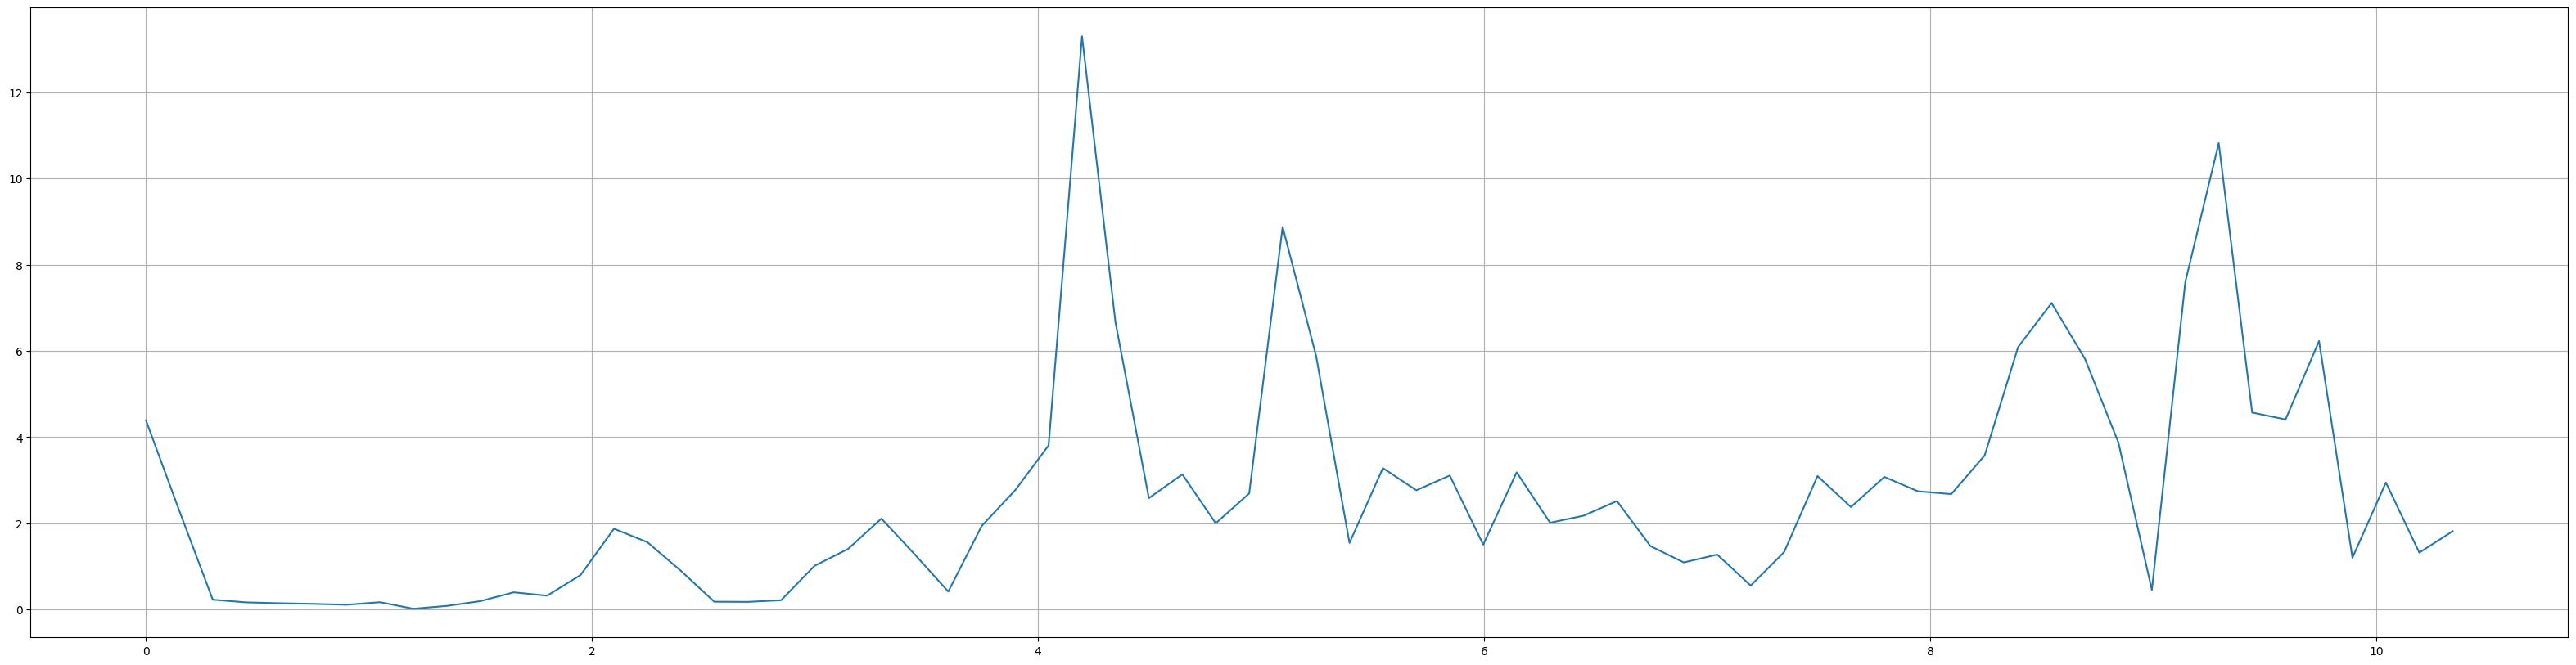

In [6]:
plt.plot(xf_scaled[0:70], 2/N * np.abs(yf[0:N//2])[0:70])
plt.grid()

plt.show()

In [7]:
stanie = []
for i in range(14*25):
    id = i*30
    yf = frames[id,0,0,:]
    yf = _chunk_to_fft(yf)
    stanie.append(2.0/N * np.abs(yf[0:N//2])[:70])

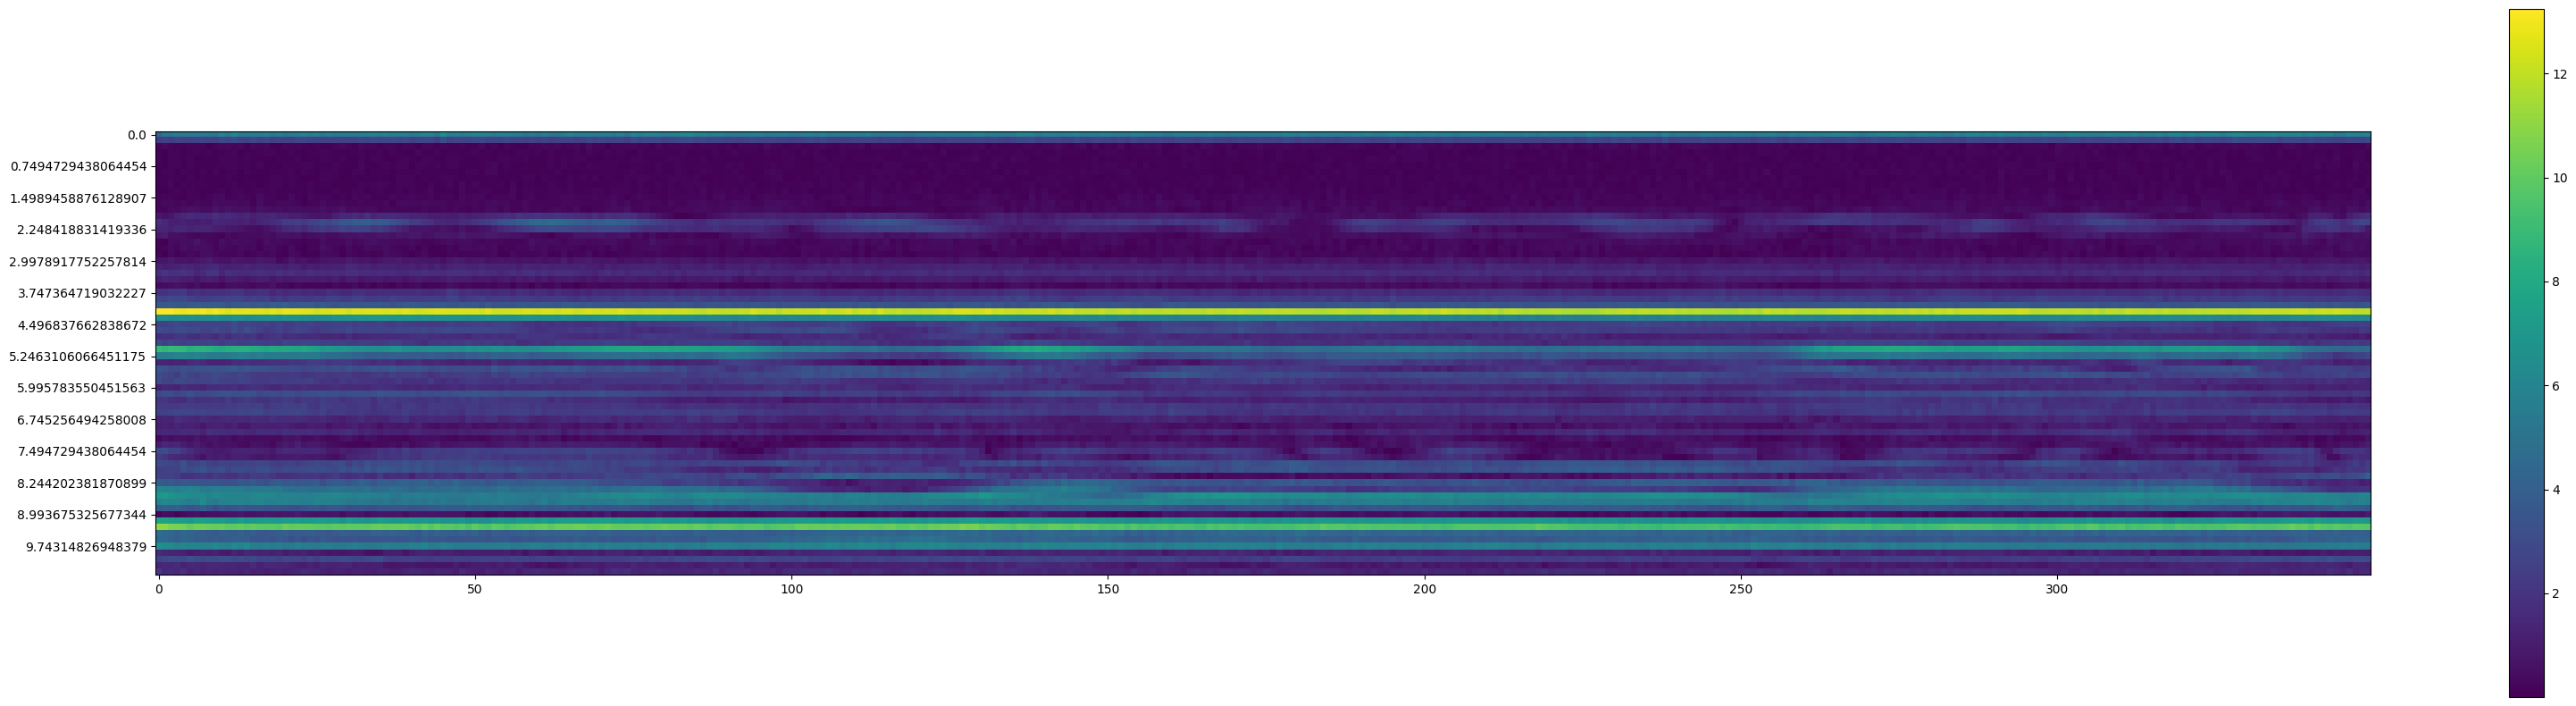

In [8]:
stanie =np.array(stanie)
plt.imshow(stanie.T)
plt.yticks(np.arange(start=0,stop=70,step=5), xf_scaled[:70][::5])
plt.colorbar()
plt.show()

Losowe chodzenie

In [9]:
frames = loaded_file['8']['dataset_8']

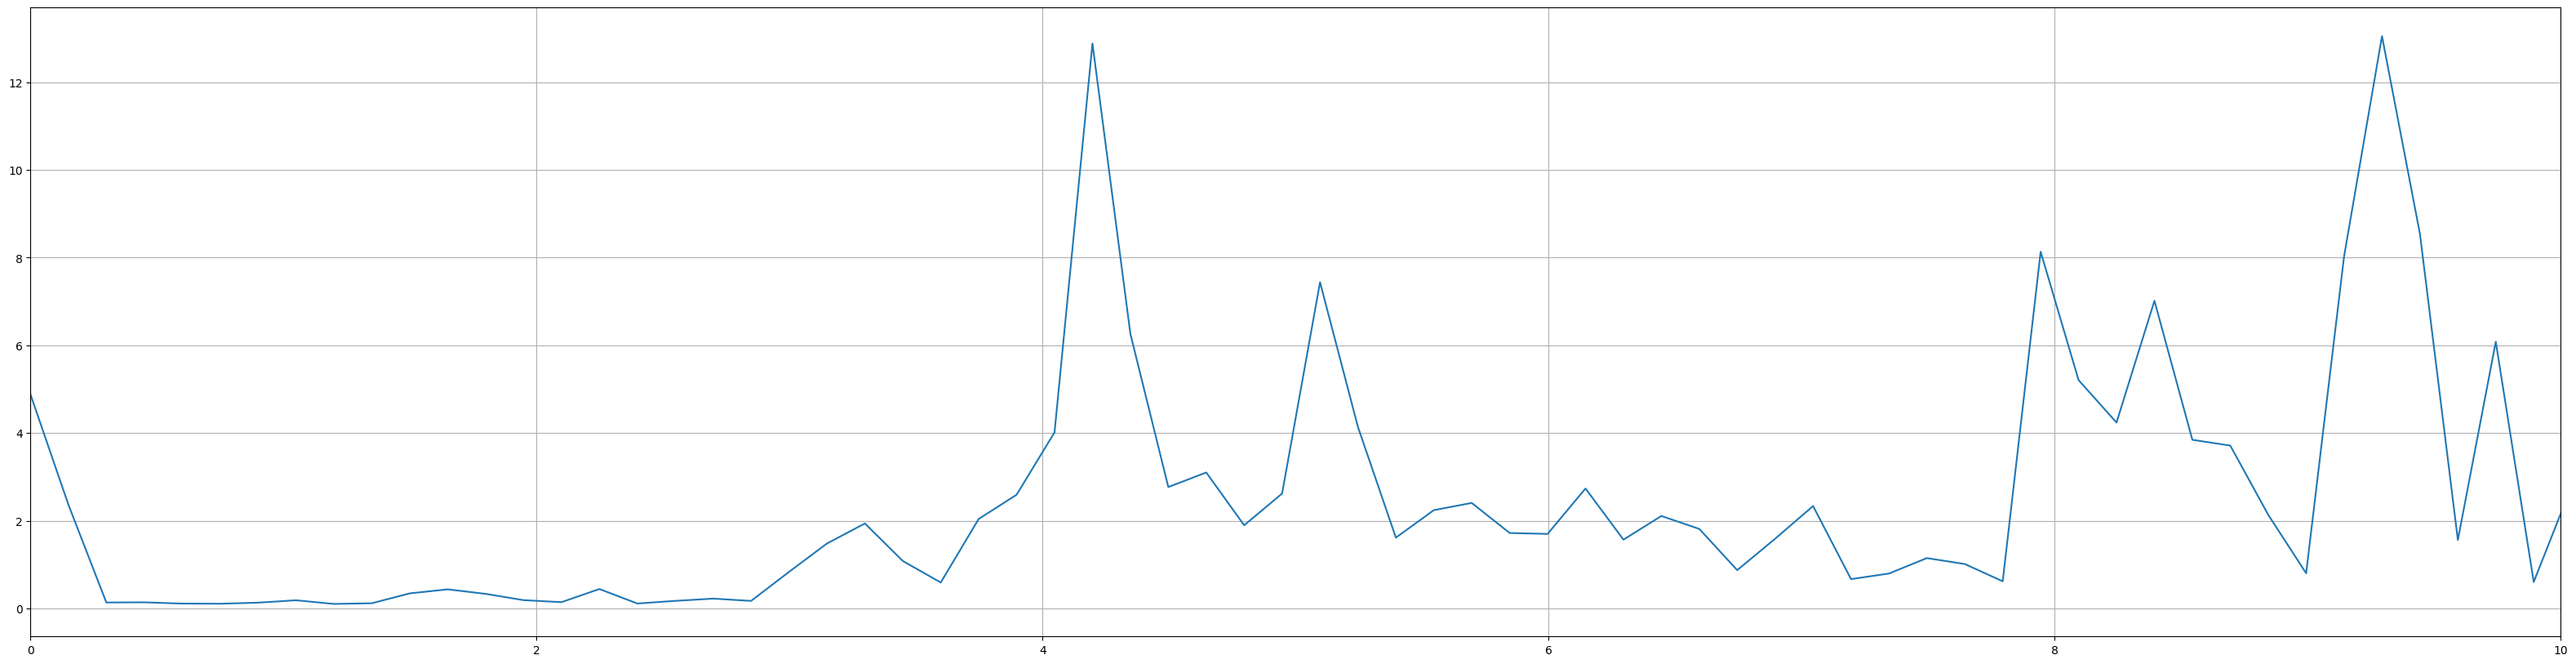

In [10]:
# Number of sample points
N = 512 * 2
# sample spacing
T = 1/2924
yf = frames[200,0,0,:]
yf = _chunk_to_fft(yf)

xf = np.fft.fftfreq(N, d=T)[:N//2]
scale = 1/0.05249386419
xf_scaled = xf / scale


plt.plot(xf_scaled, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlim(0,10)
plt.show()

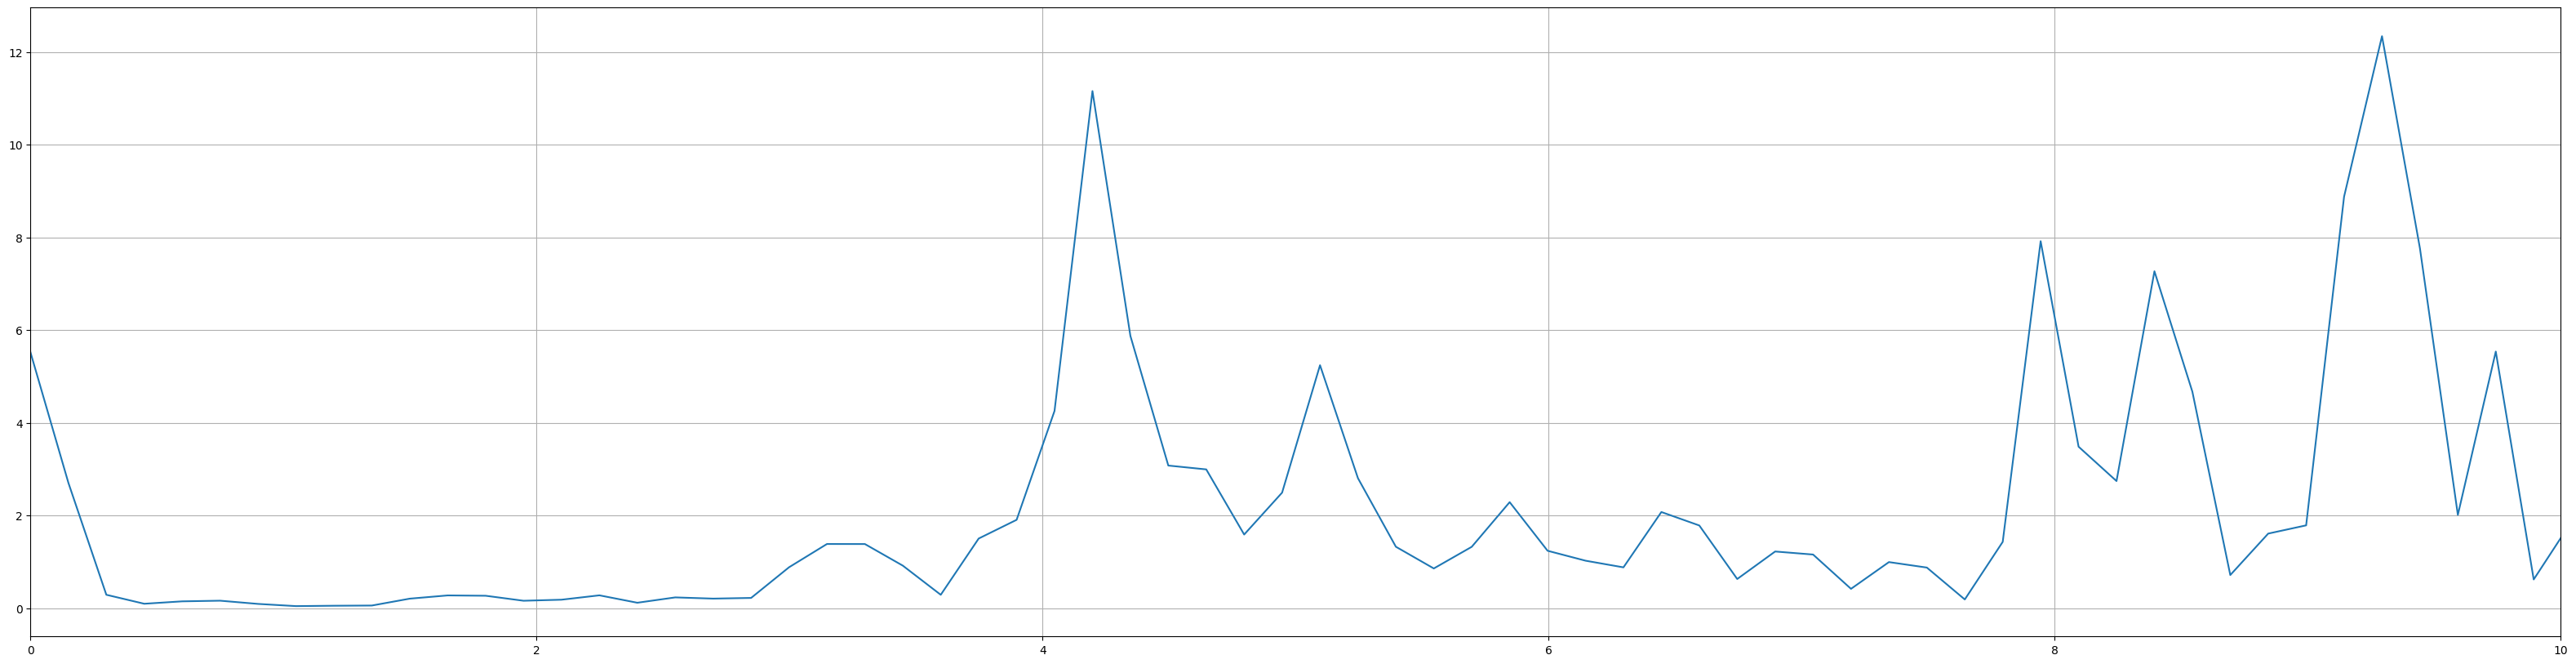

In [11]:
# Number of sample points
N = 512 * 2
# sample spacing
T = 1/2924
yf = frames[4000,0,0,:]
yf = _chunk_to_fft(yf)

xf = np.fft.fftfreq(N, d=T)[:N//2]
scale = 1/0.05249386419 # długość fali dla częstotliwości 5.711GHz
xf_scaled = xf / scale


plt.plot(xf_scaled, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlim(0,10)
plt.show()

In [12]:
lst = []
for i in range(540):
    id = i*30
    yf = frames[id,0,0,:]
    yf = _chunk_to_fft(yf)
    lst.append(2.0/N * np.abs(yf[0:N//2])[:70])


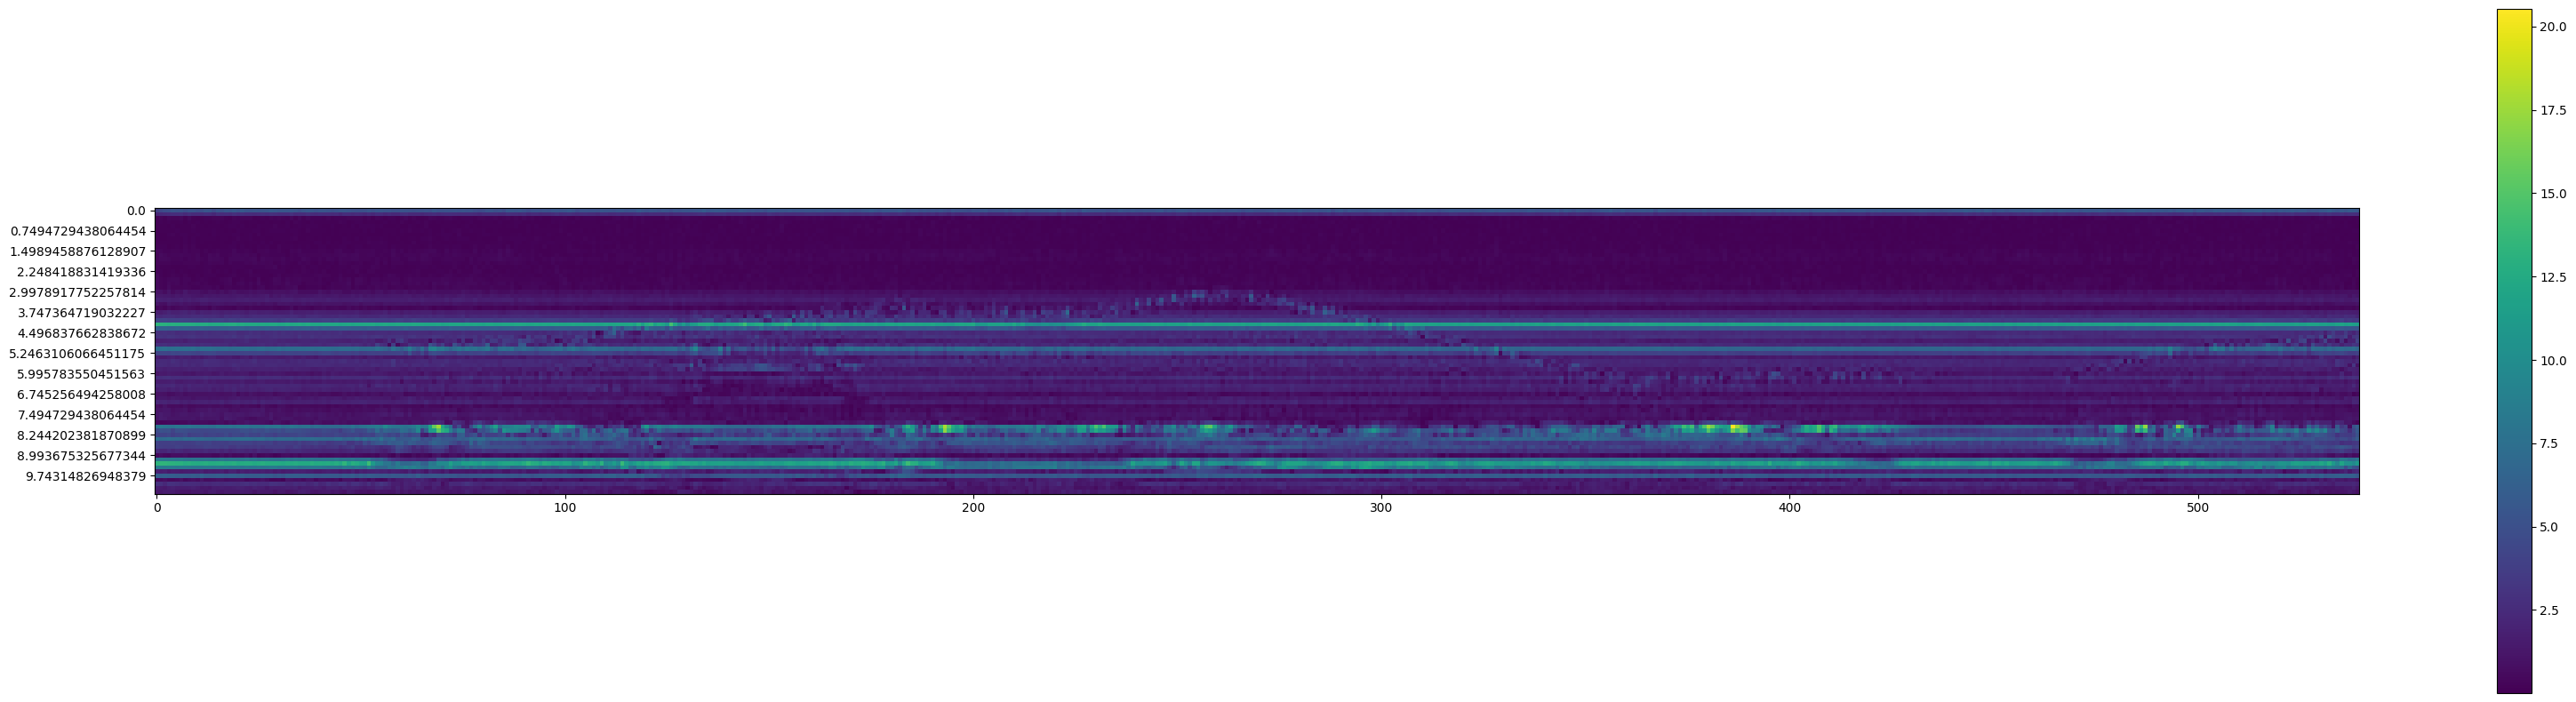

In [17]:
lst =np.array(lst)
plt.imshow(lst.T)
plt.yticks(np.arange(start=0,stop=70,step=5), xf_scaled[:70][::5])
plt.colorbar()
plt.show()

Próba odfiltrowania stałych, nie wiem skąd one pochodzą i nie podobają mi się.  To nie zadziała, gdy obiekt jest w bezruchu

In [14]:
chodzenie = np.zeros_like(lst)
for i, frame in enumerate(lst):
    if i != 0:
        chodzenie[i] = frame - lst[0]

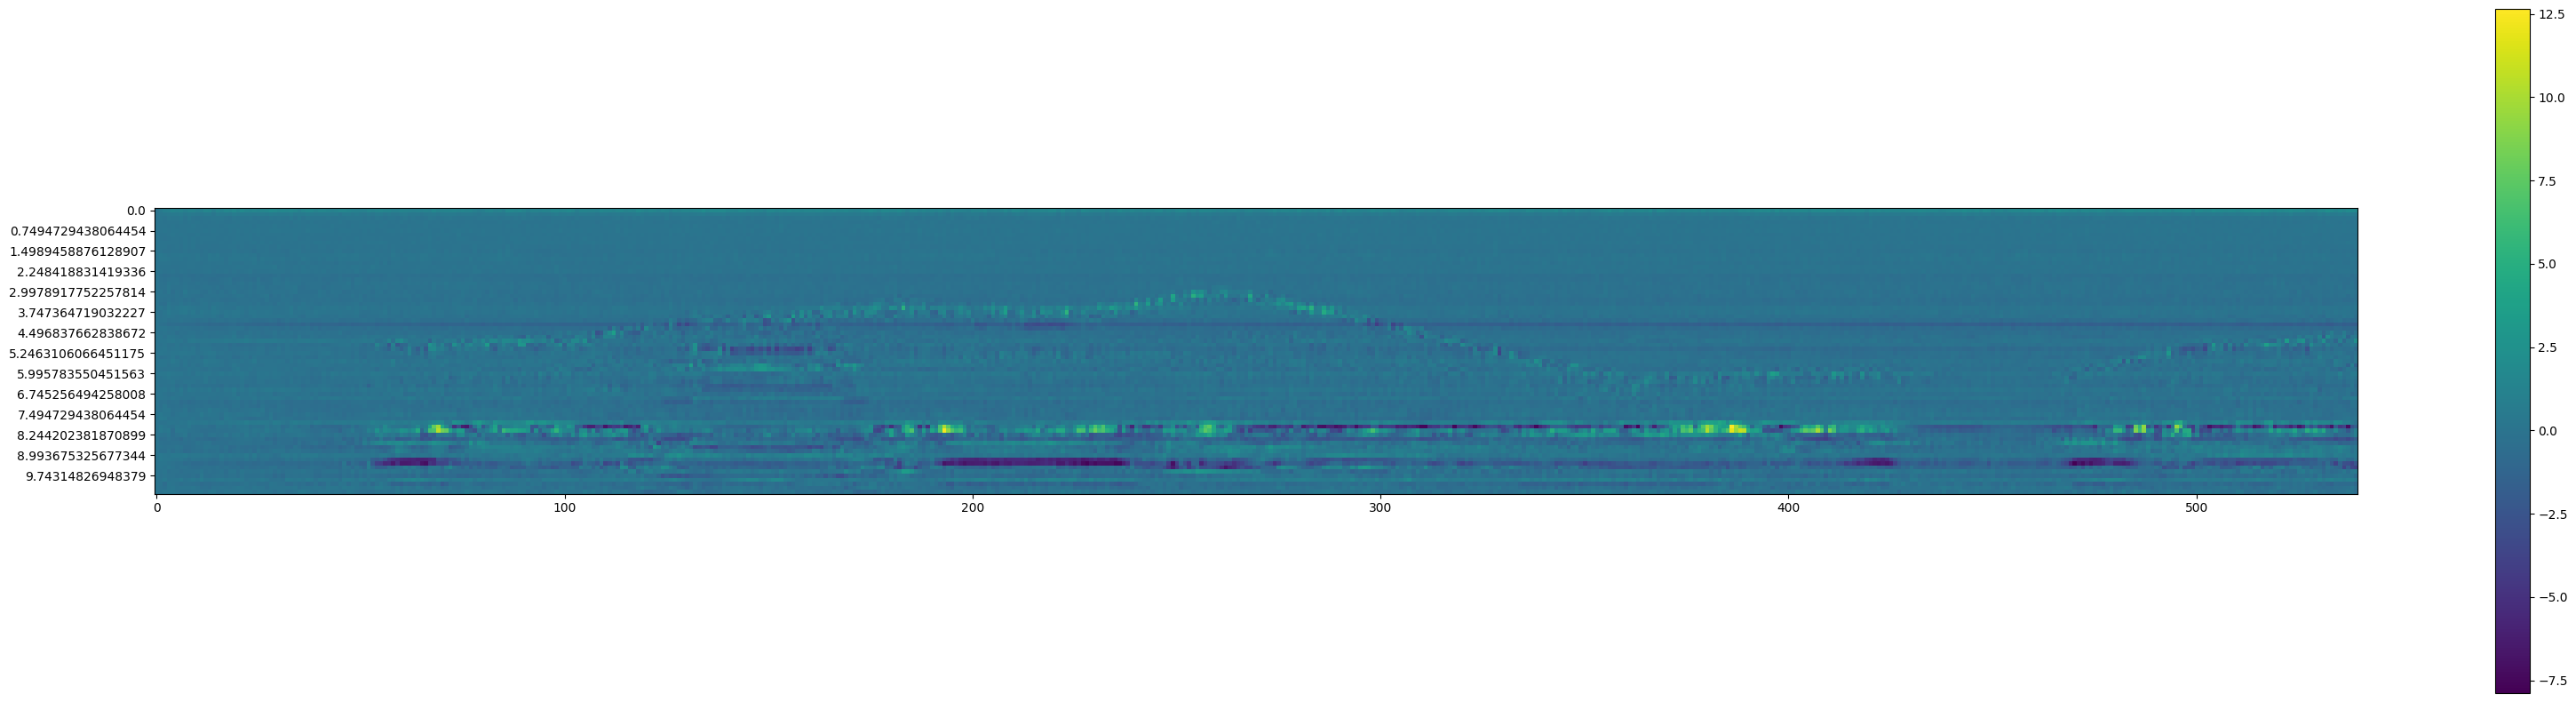

In [16]:
plt.imshow(chodzenie.T)
plt.yticks(np.arange(start=0,stop=70,step=5), xf_scaled[:70][::5])
plt.colorbar()
plt.show()

In [40]:
loaded_file.close()